In [ ]:
import torch
import numpy

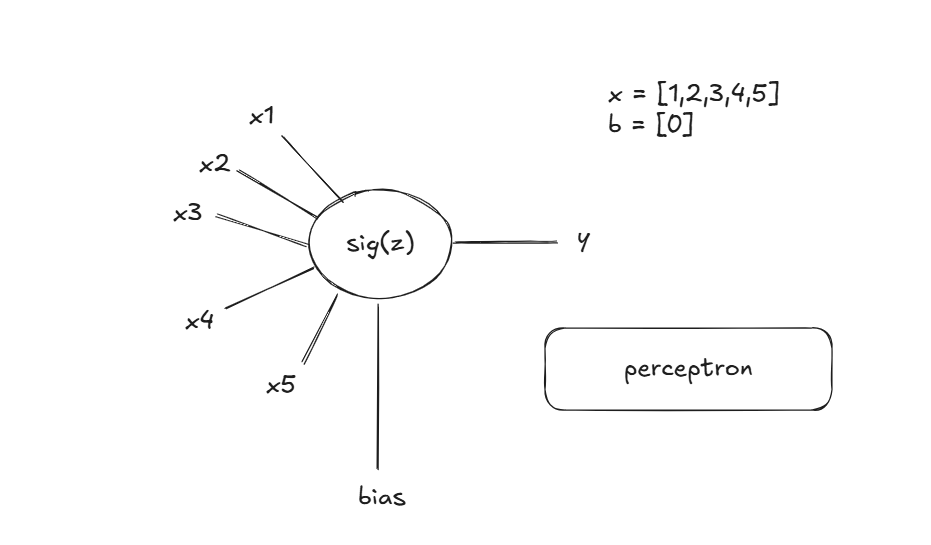

In [ ]:
class model_:
  def __init__(self,X):
    self.weights =  torch.rand(X.shape[1],1,dtype=torch.float32,requires_grad=True)
    self.bias = torch.rand(1,dtype=torch.float32,requires_grad=True)

  def forward(self,X): # feed forward
    z = torch.matmul(X,self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self,y_pred,y_true):
    # clamp prediction to avoid log(0) = binary cross entropy
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred,epsilon,1-epsilon)
    # to calulate loss
    loss = -(y_true*torch.log(y_pred) + (1-y_true)*torch.log(1-y_pred)).mean()
    return loss




In [ ]:
## creting model pipeline
epochs = 10
learning_rate = 0.01
x = torch.rand(1,5,dtype=torch.float32)
y_train = torch.tensor(1)
model = model_(x)
for epoch in range(epochs):
  y_pred = model.forward(x)
  loss = model.loss_function(y_pred,y_train)
  loss.backward()

  with torch.no_grad():
    model.weights -= learning_rate*model.weights.grad
    model.bias -= learning_rate*model.bias.grad

  model.weights.grad.zero_()
  model.bias.grad.zero_()

  print(f"Epochs:{epoch+1}, loss:{loss.item()}")

Epochs:1, loss:0.12196029722690582
Epochs:2, loss:0.12150783091783524
Epochs:3, loss:0.12105853855609894
Epochs:4, loss:0.1206122636795044
Epochs:5, loss:0.12016914784908295
Epochs:6, loss:0.11972904950380325
Epochs:7, loss:0.11929210275411606
Epochs:8, loss:0.1188579648733139
Epochs:9, loss:0.11842689663171768
Epochs:10, loss:0.11799877136945724
